In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dense, Dropout

In [2]:
train_dir = "C:/Users/Justin/.kaggle/input/train"
test_dir = "C:/Users/Justin/.kaggle/input/test"

In [3]:
from tensorflow._api.v2.random import shuffle
tf.random.set_seed(42)
generator = ImageDataGenerator(rescale = 1./255.,
                              horizontal_flip=True,
                              vertical_flip=False,
                              zoom_range=0.05,
                              rotation_range=25)

train_data = generator.flow_from_directory(train_dir,
                                               batch_size=32, 
                                               target_size=(224, 224), 
                                               class_mode="categorical", 
                                               seed=42)

test_data = generator.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               shuffle=False,
                                               seed=42)

Found 2339 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


In [4]:
label = [k for k in test_data.class_indices]
label

['AFRICAN LEOPARD',
 'CARACAL',
 'CHEETAH',
 'CLOUDED LEOPARD',
 'JAGUAR',
 'LIONS',
 'OCELOT',
 'PUMA',
 'SNOW LEOPARD',
 'TIGER']

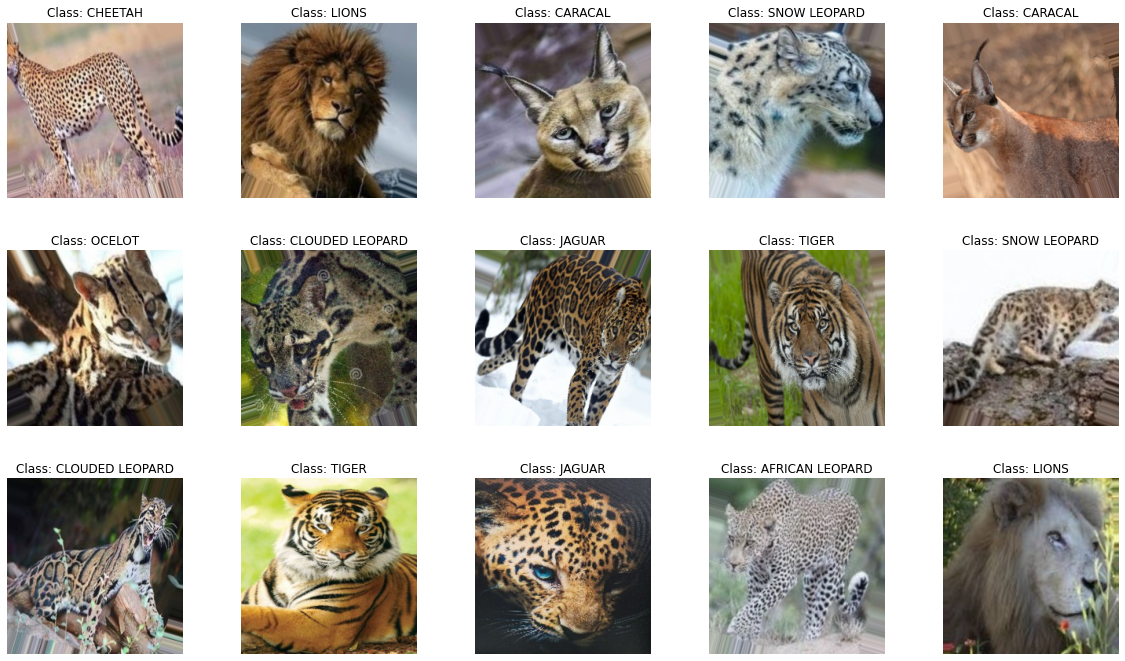

In [5]:
label = [k for k in train_data.class_indices]
samples = train_data.__next__()
images = samples[0]
titles = samples[1]
plt.figure(figsize=(20,20))

for i in range(15):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(hspace=0.3,wspace=0.3)
    plt.imshow(images[i])
    plt.title(f"Class: {label[np.argmax(titles[i],axis=0)]}")
    plt.axis("off")

In [6]:
samples[0][0].shape

(224, 224, 3)

In [7]:
import tensorflow_hub as hub
from tensorflow.keras import layers

resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"

feature_extractor_layer = hub.KerasLayer(resnet_url,
                                           trainable=False,
                                           name='feature_extraction_layer',
                                           input_shape= (224,224,3))

In [8]:
model_3_resnet = tf.keras.models.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Dropout(.45),
  tf.keras.layers.Dense(256,activation='relu'),
  tf.keras.layers.Dropout(.45),
  tf.keras.layers.Dense(10, activation='softmax')
])

model_3_resnet.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 =model_3_resnet.fit(train_data,epochs=10)

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/10
25/74 [=========>....................] - ETA: 51s - loss: 0.3744 - accuracy: 0.2862

KeyboardInterrupt: 